# Tori Lowery's Data Cleaning

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None, "display.max_rows", None)

# Read in csv
houses = pd.read_csv("../data/train.csv", index_col = "Id")

# Adjust MSSubClass to string
houses["MSSubClass"] = houses["MSSubClass"].astype('str')

# Convert Alley to Factor
houses["Alley"] = houses["Alley"].map(lambda x: 0 if pd.isna(x) else 1)

# Impute missing GarageYrBlt from year house built
houses.loc[pd.isna(houses.GarageYrBlt), "GarageYrBlt"] = 0
houses.loc[pd.isna(houses.GarageType), "GarageType"] = "None"

# Bin LotConfig to impute missing LotFrontage
mean_frontage = dict(houses.groupby("LotConfig")["LotFrontage"].mean())
mean_frontage
houses.loc[pd.isna(houses["LotFrontage"]), "LotFrontage"] = houses.loc[pd.isna(houses["LotFrontage"]), "LotConfig"].replace(mean_frontage)
houses = houses.drop("LotConfig", axis = 1)

# Convert Fireplace Quality to Scale
houses["FireplaceQu"] = houses["FireplaceQu"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)

# Convert Exterior Quality and Condition to Scale
houses["ExterQual"] = houses["ExterQual"].apply(lambda x: 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["ExterCond"] = houses["ExterCond"].apply(lambda x: 0 if x == "Po" else 1 if x == "Fa" else 2 if x == "TA" else 3 if x == "Gd" else 5)

# Convert Basement Quality and Condition to Scale
houses["BsmtQual"] = houses["BsmtQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtCond"] = houses["BsmtCond"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["BsmtExposure"] = houses["BsmtExposure"].apply(lambda x: 0 if x == False else 1 if x == "No" else 2 if x == "Mn" else 3 if x == "Av" else 4)
houses["BsmtFinType1"] = houses["BsmtFinType1"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)
houses["BsmtFinType2"] = houses["BsmtFinType2"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "LwQ" else 3 if x == "Rec" else 4 if x == "BLQ" else 5 if x == "ALQ" else 6)

# Convert Heating, Kitchen, and Garage Quality and Finish to Scale
houses["HeatingQC"] = houses["HeatingQC"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["KitchenQual"] = houses["KitchenQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageQual"] = houses["GarageQual"].apply(lambda x: 0 if x == False else 1 if x == "Po" else 2 if x == "Fa" else 3 if x == "TA" else 4 if x == "Gd" else 5)
houses["GarageFinish"] = houses["GarageFinish"].apply(lambda x: 0 if x == False else 1 if x == "Unf" else 2 if x == "RFn" else 3)

# Feature Engineer total Porch/Deck Area
houses["TotalPorchSqft"] = houses["WoodDeckSF"] + houses["OpenPorchSF"] + houses["EnclosedPorch"] + houses["3SsnPorch"] + houses["ScreenPorch"]

# Drop Rows with NA (9 total) from Electrical, MasVnrType, and MasVnrArea
houses = houses[~pd.isna(houses["Electrical"])]
houses = houses[~pd.isna(houses["MasVnrType"])]

# Drop Columns
houses = houses.drop(["MiscFeature", "Fence", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
                      "PoolArea", "PoolQC", "GarageCond", 
                      "GarageCars", "BsmtFinSF1", "BsmtFinSF2"], axis=1)

# houses.to_csv("houses")
houses.dtypes
# dict(houses.isna().sum())
# houses.head(40)
# houses.shape

MSSubClass         object
MSZoning           object
LotFrontage       float64
LotArea             int64
Street             object
Alley               int64
LotShape           object
LandContour        object
Utilities          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterQual           int64
ExterCond           int64
Foundation         object
BsmtQual            int64
BsmtCond            int64
BsmtExposure        int64
BsmtFinType1        int64
BsmtFinType2        int64
BsmtUnfSF           int64
TotalBsmtSF         int64
Heating            object
HeatingQC           int64
CentralAir         object
Electrical  

In [140]:
# house_copy = houses.copy()
# for i, x in enumerate(houses.columns):
#     if houses.dtypes[i] != "object":
#         if houses[x].skew() > pd.Series(np.log(houses[x] + 1)).skew():
#             house_copy[x] = pd.Series(np.log(houses[x] + 1))

In [279]:
# house_copy.head()

In [67]:
# sns.heatmap(adj_houses.corr(), cmap = sns.diverging_palette(220, 10, as_cmap=True))
# f, ax = plt.subplots(figsize=(11, 9))

In [68]:
# np.log(houses.GarageArea.agg(["min", "median", "mean", "max", "count", "std"]))

# Gradient Boost

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
X = pd.get_dummies(houses.drop(["SalePrice", "MSSubClass"], axis=1), drop_first=True, dummy_na=True)
y = houses['SalePrice']
y_log = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
gbm.set_params(verbose=0, random_state=42)
gbm.fit(X_train, y_train)
print("The train score is: ", gbm.score(X_train, y_train))
print("The test score is: ", gbm.score(X_test, y_test))

The train score is:  0.9682181547298004
The test score is:  0.9222006181409751


In [199]:
gbm.set_params(learning_rate=0.1, n_estimators=500, verbose=0, loss='ls', 
               max_depth=3, max_features=None, min_impurity_decrease=0.00, random_state=42)
gbm.fit(X_train, y_train)
print("The new train score is: ", gbm.score(X_train, y_train))
print("The new test score is: ", gbm.score(X_test, y_test))

The new train score is:  0.994137053300868
The new test score is:  0.927022724684816


In [200]:
grid_para_gbm = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [.0001, .001, .01, 0.1],
    "max_depth": list(range(1, 10)),
    "max_features": [None, 1, 2, 3],
    "random_state": [42]}
grid_search_gbm = GridSearchCV(gbm, grid_para_gbm, scoring='r2', cv=5, n_jobs=-1)
grid_search_gbm.fit(X_train, y_train)
print("The best train score is: ", grid_search_gbm.best_estimator_.score(X_train, y_train))
print("The best test score is: ", grid_search_gbm.best_estimator_.score(X_test, y_test))

The best train score is:  0.9653301803244188
The best test score is:  0.9071519763531863


In [213]:
# gbm.feature_importances_[gbm.feature_importances_ > 0]

Text(0.5, 0, 'Feature Importance (%)')

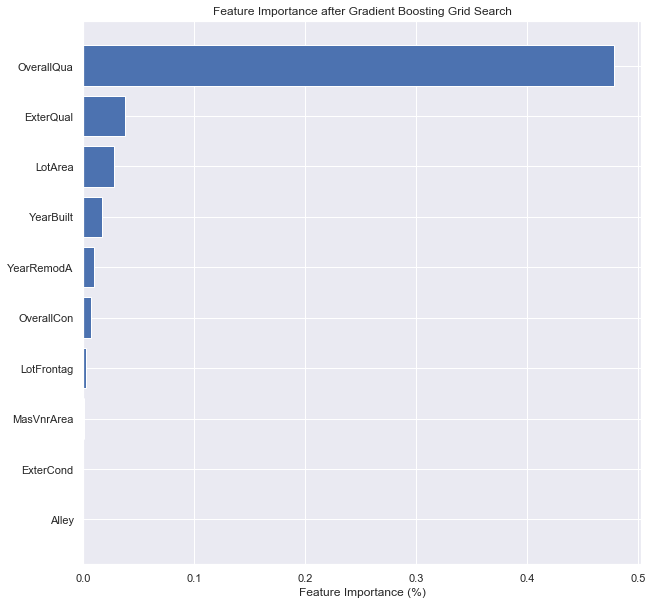

In [212]:
key_features = list(zip(pd.get_dummies(houses.drop(["SalePrice", "MSSubClass"], axis=1)).columns[gbm.feature_importances_ > 0], 
                    gbm.feature_importances_[gbm.feature_importances_ > 0]))
key_features = np.array(key_features[:10], dtype=[('feature', 'S10'), ('importance', 'float')])
name, importance = zip(*np.sort(key_features, order="importance"))
plt.barh(name, importance)
plt.title("Feature Importance after Gradient Boosting Grid Search")
plt.xlabel("Feature Importance (%)")

# Random Forest

In [193]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()

In [194]:
randomForest.set_params(random_state=42, n_estimators=500, max_features=100, max_depth=10)

# Use selected columns
use_columns = ["MSSubClass", "MSZoning", "LotFrontage", "Alley", "Utilities", "Neighborhood", "Condition1", 
              "BldgType", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "ExterCond",
              "BsmtExposure", "TotalBsmtSF", "Heating", "HeatingQC", "CentralAir", "1stFlrSF", "2ndFlrSF",
               "Fireplaces", "KitchenAbvGr", "KitchenQual", "FireplaceQu", "GarageType", "GarageArea", "GarageQual", 
              "SaleType", "SaleCondition", "TotalPorchSqft"]
X = pd.get_dummies(houses[use_columns], drop_first=True, dummy_na=True)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train) 
print("The train score using selected columns is: ", randomForest.score(X_train, y_train)) 
print("The test score using selected columns is: ", randomForest.score(X_test, y_test), "\n") 

# Selected columns with log house price
y2 = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train)
print("The train score using selected columns and log sale price is: ", randomForest.score(X_train, y_train)) 
print("The test score using selected columns and log sale price is: ", randomForest.score(X_test, y_test), "\n") 

# use all columns
X = pd.get_dummies(houses.drop(["SalePrice"], axis=1), drop_first=True, dummy_na=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train)
print("The train score using all columns is: ", randomForest.score(X_train, y_train)) 
print("The test score using all columns is: ", randomForest.score(X_test, y_test), "\n") 

# All columns and with log price
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train)
print("The train score using all columns and log sale price is: ", randomForest.score(X_train, y_train)) 
print("The test score using all columns and log sale price is: ", randomForest.score(X_test, y_test)) 

The train score using selected columns is:  0.970268311117721
The test score using selected columns is:  0.9014963942399398 

The train score using selected columns and log sale price is:  0.9701122647085553
The test score using selected columns and log sale price is:  0.8690854354473047 

The train score using all columns is:  0.9750386705221838
The test score using all columns is:  0.9194047638360042 

The train score using all columns and log sale price is:  0.9754006719265037
The test score using all columns and log sale price is:  0.8905771826834027


Text(0.5, 1.0, 'Random Forest, Feature Importance')

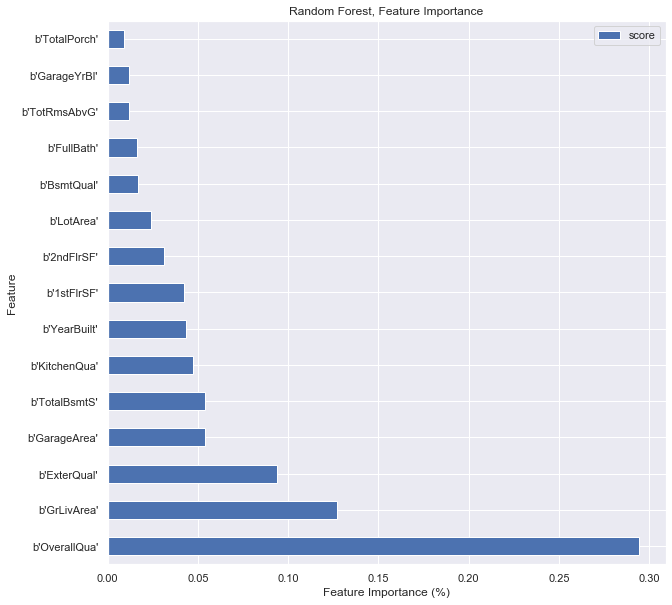

In [215]:
# Using the best combination found above:
X = pd.get_dummies(houses.drop(["SalePrice"], axis=1), drop_first=True, dummy_na=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
randomForest.fit(X_train, y_train)

feature_importance = list(zip(X_train.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'Feature':name,'score':score})[:15].plot.barh(x='Feature', y='score')
plt.xlabel("Feature Importance (%)")
plt.title("Random Forest, Feature Importance")

## RF Grid Search

In [9]:
grid_para_forest = {
    "n_estimators": [300, 500, 800],
    "max_depth": list(range(9, 22, 2)),
    "random_state": [42]}
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=10,
                                             max_features=100,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=500, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,


In [10]:
print("The best params found were:", grid_search_forest.best_params_)
print("The best score found was:", grid_search_forest.best_score_)
print("The train score with the best estimator is:", grid_search_forest.score(X_train, y_train))
print("The test score with the best estimator is:", grid_search_forest.score(X_test, y_test))

The best params found were: {'max_depth': 19, 'n_estimators': 800, 'random_state': 42}
The best score found was: 0.8267021866440002
The train score with the best estimator is: 0.979546757977026
The test score with the best estimator is: 0.9180379376859372


## Examine Effects of Different Number of Trees

In [ ]:
n_trees_range = range(10, 500, 100)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
#     for n_feat in n_feat_range:
    randomForest.set_params(n_estimators=n_trees, max_features = 26, random_state=42, oob_score=True)
    randomForest.fit(X_train, y_train)
    train_error2.append(1 - randomForest.score(X_train, y_train))
    test_error2.append(1 - randomForest.score(X_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

# Variance Test

In [232]:
import sklearn.feature_selection as fs
import pprint

# Find Variances of all columns
variances = dict(zip(houses.columns, np.var(houses, 0)))
# print('Variation:')
# pprint.pprint(variances)

# Filter out unwanted columns with variance below 1
variances_filtered = []
for k, v in variances.items():
    if v > .1:
        variances_filtered.append(k)
unwanted_columns = list(variances.keys() - variances_filtered)
unwanted_columns.extend(["SalePrice", "MSSubClass"])

In [233]:
X = pd.get_dummies(houses.drop(unwanted_columns, axis=1), drop_first=True, dummy_na=True)
y = houses['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

randomForest.set_params(random_state=42, n_estimators=500, max_features=100, max_depth=10)
randomForest.fit(X_train, y_train)
print("The RF train score with low variance columns dropped is: ", randomForest.score(X_train, y_train)) 
print("The RF test score with low variance columns dropped is: ", randomForest.score(X_test, y_test)) 

The RF train score with low variance columns dropped is:  0.9746600948833943
The RF test score with low variance columns dropped is:  0.9196656691370558


# Multiple Linear Regression

In [80]:
from sklearn import linear_model
from sklearn.metrics import r2_score
ols = linear_model.LinearRegression()

In [234]:
# Log improves MLR performance
# Drop columns found to have little variance
X2 = pd.get_dummies(houses.drop(unwanted_columns, axis=1), drop_first=True, dummy_na=True)
y2 = np.log(houses['SalePrice'])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [235]:
ols.fit(X2_train, y2_train)
ols.score(X2_train, y2_train)

0.939972827099102

In [236]:
ols.score(X2_test, y2_test)

0.6980629831416827

In [237]:
X = pd.get_dummies(house_copy.drop("SalePrice", axis=1), drop_first=True, dummy_na=True)
y = house_copy['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ols.fit(X_train, y_train)
print("Boxcox Transformed Data, Train Score:", ols.score(X_train, y_train))
print("Boxcox Transformed Data, Test Score:", ols.score(X_test, y_test))

Boxcox Transformed Data, Train Score: 0.941073084553282
Boxcox Transformed Data, Test Score: -218098309061.20905


## Regularization

### A. Ridge Exploration

In [158]:
from sklearn.linear_model import Ridge
ridge = Ridge()
X = pd.get_dummies(houses.drop("SalePrice", axis=1), drop_first=True, dummy_na=True)
# X2 = pd.get_dummies(house_copy.drop("SalePrice", axis=1), drop_first=True, dummy_na=True)
y = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'slope values')

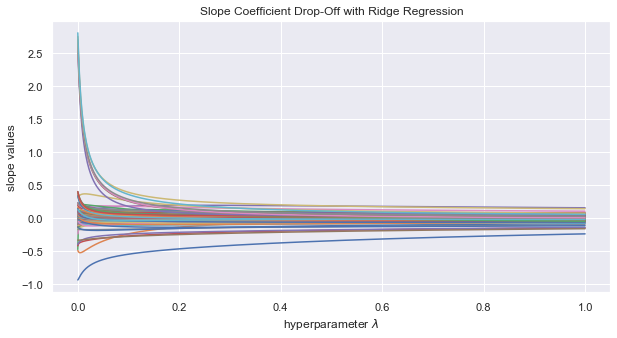

In [159]:
# Test different alphas
alphas = np.linspace(.00001, 1, 1000)
ridge.set_params(normalize=True)
coefs  = []
scores = []
test_scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(X_train, y_train)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(X_train, y_train))
        test_scores.append(ridge.score(X_test, y_test))
coefs = pd.DataFrame(coefs, index = alphas, columns = X_train.columns)  

# Plot the effects of increasing lambdas
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
plt.title(r'Slope Coefficient Drop-Off with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0, 0.5, '$R^2$')

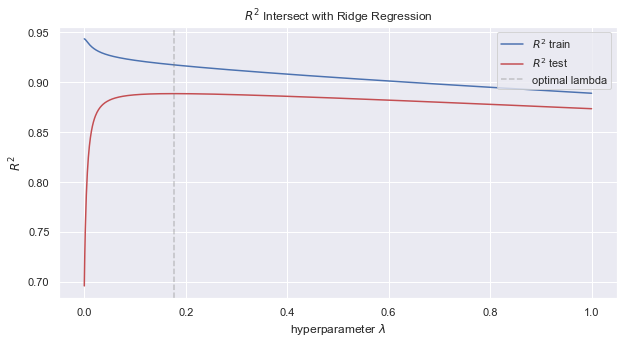

In [160]:
# Plot the R^2 scores for train and test
plt.plot(alphas, scores, c='b', label=r'$R^2$ train')
plt.plot(alphas, test_scores, c='r', label=r'$R^2$ test')
highest_test_score = alphas[np.array(test_scores) == max(test_scores)]
plt.axvline(highest_test_score, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.title(r'$R^2$ Intersect with Ridge Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [161]:
ridge.set_params(normalize=True, alpha=highest_test_score)
ridge.fit(X_train, y_train)
print("The Ridge train score is: ", ridge.score(X_train, y_train))
print("The Ridge test score is: ", ridge.score(X_test, y_test))

The Ridge train score is:  0.9173749339860919
The Ridge test score is:  0.8885219353748778


In [66]:
# sorted(ridge.coef_)

### B. Lasso Exploration

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2930115733.3814697, tolerance: 749744684.4883518
  positive)


Text(0.5, 1.0, 'Slope Coefficient Drop-Off with Lasso Regression')

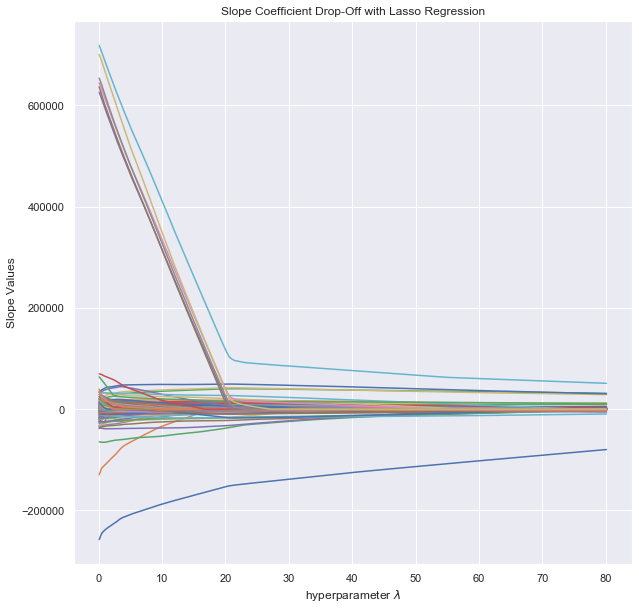

In [163]:
from sklearn.linear_model import Lasso
lasso = Lasso()
X = pd.get_dummies(houses.drop("SalePrice", axis=1), drop_first=True, dummy_na=True)
# X2 = pd.get_dummies(house_copy.drop("SalePrice", axis=1), drop_first=True, dummy_na=True)
y = houses["SalePrice"]
# y2 = np.log(houses['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different lambdas
alphas = np.linspace(0.1,80.1,200)
lasso.set_params(normalize=True)
coefs_lasso  = []
scores_lasso = []
scores_test_lasso = []
for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(X_train, y_train)  
        coefs_lasso.append(lasso.coef_)
        scores_lasso.append(lasso.score(X_train, y_train))
        scores_test_lasso.append(lasso.score(X_test, y_test))
coefs = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  

# Plot different lambdas
plt.rcParams['figure.figsize'] = (10,10)
for name in coefs.iloc[0, :].sort_values().index:
    plt.plot(coefs.index, coefs[name], label=name)
# plt.legend(loc=4)   
# plt.ylim(-500000, 600000)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'Slope Values')
plt.title("Slope Coefficient Drop-Off with Lasso Regression")

In [183]:
coefs.loc[0.100000, coefs.loc[0.100000, ] < -100000]

Condition2_PosN   -257723.987128
Condition2_RRAe   -129521.928289
Name: 0.1, dtype: float64

Text(0, 0.5, '$R^2$')

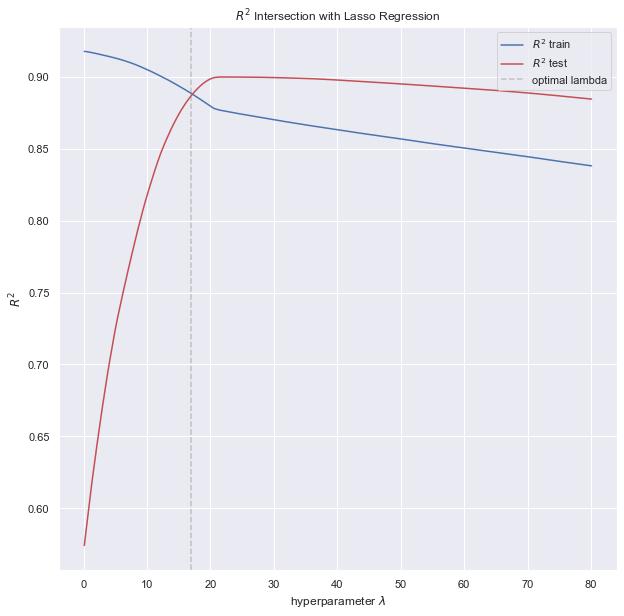

In [164]:
# plot to compare train and test R^2 scores
plt.plot(alphas, scores_lasso, c='b', label=r'$R^2$ train')
plt.plot(alphas, scores_test_lasso, c='r', label=r'$R^2$ test')
lasso_overfit = alphas[np.array(scores_test_lasso) < np.array(scores_lasso)]
last_overfit = max(lasso_overfit)
plt.axvline(last_overfit, linestyle='--', color='grey', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.title(r'$R^2$ Intersection with Lasso Regression')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [217]:
last_overfit

16.984422110552767

In [165]:
lasso.set_params(normalize=True, alpha=last_overfit)
lasso.fit(X_train, y_train)
print("The new lasso train score is:", lasso.score(X_train, y_train))
print("The new lasso test score is:", lasso.score(X_test, y_test))

The new lasso train score is: 0.8882498274907811
The new lasso test score is: 0.8868640413653298


## Observe P values and conf intervals for Features

In [265]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train)
ols3 = sm.OLS(y_train, X_add_const)
ans = ols3.fit()
# print(ans.summary())
ans.summary().tables[1]

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,coef,std err,t,P>|t|,[0.025,0.975]
const,-22.2588,41.389,-0.538,0.591,-103.481,58.964
LotFrontage,0.0200,0.017,1.152,0.250,-0.014,0.054
LotArea,0.0850,0.014,5.953,0.000,0.057,0.113
Alley,5.982e-13,6.07e-13,0.985,0.325,-5.93e-13,1.79e-12
OverallQual,0.2328,0.035,6.684,0.000,0.164,0.301
OverallCond,0.2447,0.029,8.327,0.000,0.187,0.302
YearBuilt,3.8820,0.891,4.357,0.000,2.133,5.631
YearRemodAdd,1.5894,0.563,2.822,0.005,0.484,2.695
MasVnrArea,0.0107,0.007,1.646,0.100,-0.002,0.024
ExterQual,0.0600,0.034,1.756,0.079,-0.007,0.127


## Comparing R^2 to All other Features

In [ ]:
cont_features = ['LotFrontage', 'LotArea', "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", 'MasVnrArea', 
                "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                "BsmtUnfSF", "HeatingQC", 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', "BsmtFullBath", 
                'GrLivArea', "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "KitchenQual", 
                "TotRmsAbvGrd", "Fireplaces", "FireplaceQu", 'GarageArea', "GarageFinish", "GarageArea", "GarageQual",
                "MiscVal", "MoSold", "YrSold", 'TotalPorchSqft']
scores = {}
ols2 = linear_model.LinearRegression()
for feature_name in cont_features:
    df2 = houses.copy().drop("GarageYrBlt", axis=1)
    df2 = pd.get_dummies(df2, drop_first=True, dummy_na=True)
    feature = df2[feature_name].copy()
    df2.drop(feature_name, axis=1, inplace=True)
    ols2.fit(df2, feature)
    scores[feature_name] = ols2.score(df2, feature) 

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index().sort_values(["R2"]))
plt.title('$R^2$ of a continuous feature against the other features')
for item in ax.get_xticklabels(): item.set_rotation(90)

# Visualization of Data

In [137]:
houses = pd.read_csv("../data/train.csv", index_col = "Id")
sum(pd.isna(houses["GarageYrBlt"]))
# houses["GarageYrBlt"]

81

In [138]:
sum(pd.isna(houses["GarageYrBlt"]))

81

In [139]:
sum(pd.isna(houses["LotFrontage"]))

259

In [140]:
# houses.groupby("GarageYrBlt")["GarageYrBlt"].count()

In [148]:
# Impute missing GarageYrBlt from year house built
# houses.loc[pd.isna(houses.GarageYrBlt), "GarageYrBlt"] = houses.loc[pd.isna(houses.GarageYrBlt), "YearBuilt"]

# # Bin LotConfig to impute missing LotFrontage
# mean_frontage = dict(houses.groupby("LotConfig")["LotFrontage"].mean())
# mean_frontage
# houses.loc[pd.isna(houses["LotFrontage"]), "LotFrontage"] = houses.loc[pd.isna(houses["LotFrontage"]), "LotConfig"].replace(mean_frontage)
# houses = houses.drop("LotConfig", axis = 1)
houses["LotFrontage"] = round(houses["LotFrontage"], 1)
houses.head(30)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,84.0,10382,Pave,NaN,IR1,Lvl,AllPub,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


### 1. 1st and 2nd Floor  and Basement SQFT against Price

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
houses.plot(ax=axes[0], kind='scatter', x='1stFlrSF', y='SalePrice',c='b', alpha=.2)
houses.plot(ax=axes[1], kind='scatter', x='2ndFlrSF', y='SalePrice',c='r', alpha=.2)
houses.plot(ax=axes[2], kind='scatter', x='TotalBsmtSF', y='SalePrice',c='g', alpha=.2)
plt.show()

### 2. Lot Frontage, Year Built, and Year Remodelled against Price

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
houses.plot(ax=axes[0], kind='scatter', x='LotFrontage', y='SalePrice',c='b',  alpha=.2)
houses.plot(ax=axes[1], kind='scatter', x='YearBuilt', y='SalePrice',c='r', alpha=.2)
houses.plot(ax=axes[2], kind='scatter', x='YearRemodAdd', y='SalePrice',c='g', alpha=.2)
plt.show()

### 3. Overall Quality against Price

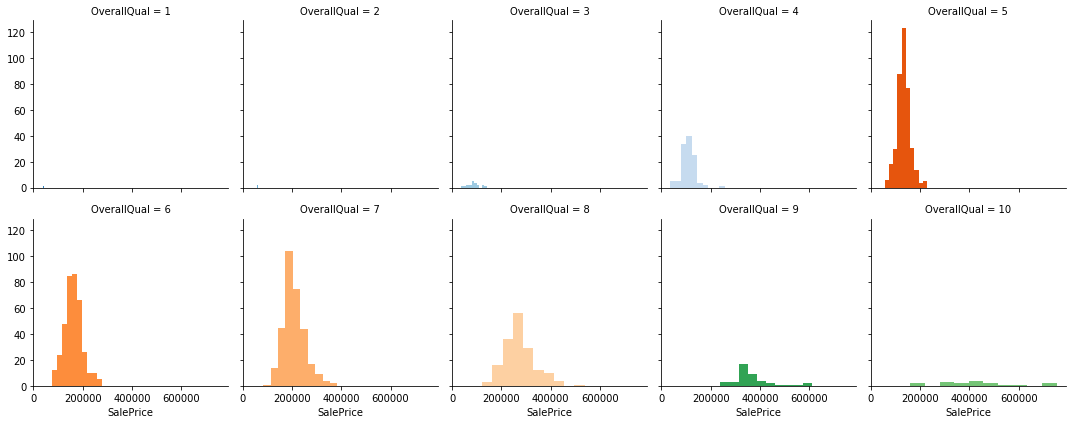

In [3]:
import seaborn as sns
g = sns.FacetGrid(data=houses, col="OverallQual", hue="OverallQual", palette="tab20c",
                     col_wrap=5, height=3)
g.map(plt.hist, "SalePrice")

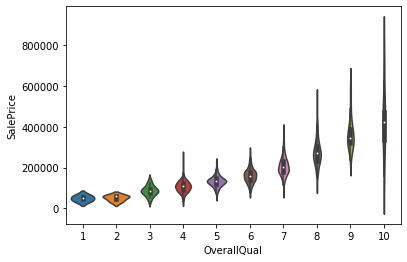

In [4]:
sns.violinplot(x="OverallQual", y="SalePrice", data=houses)

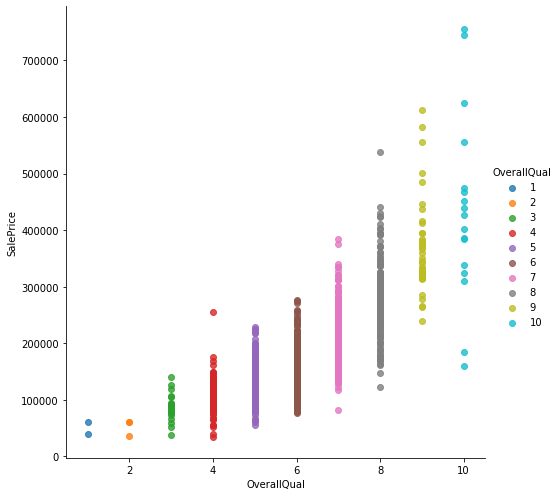

In [5]:
sns.lmplot(y="SalePrice", x="OverallQual", hue="OverallQual",
               height=7, data=houses)

### 4. MS Zoning against Price

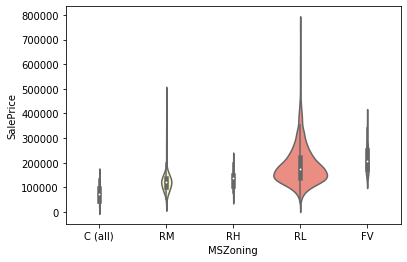

In [6]:
sns.violinplot(x="MSZoning", y="SalePrice", data=houses, palette="Set3", scale="count", order=["C (all)", "RM", "RH", "RL", "FV"])

### 5. Total Porch and Deck SQFT (feature eng.) against Price

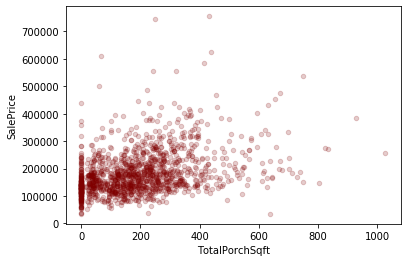

In [7]:
houses.plot(kind='scatter', x='TotalPorchSqft', y='SalePrice',c='maroon', alpha=.2)
plt.show()

### 6. Year Built grouped by Exterior Quality against Price

In [66]:
houses[houses["ExterQual"] == 2]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,PavedDrive,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalPorchSqft
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
53,90,RM,110.000000,8472,Grvl,0,IR2,Bnk,AllPub,Mod,IDOTRR,RRNn,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,2,CBlock,4,3,4,2,6,0,816,GasA,3,N,SBrkr,816,0,0,816,1,0,1,0,2,1,3,5,Typ,0,5,CarPort,1963.0,1,516,3,Y,0,5,2010,WD,Normal,110000,106
89,50,C (all),105.000000,8470,Pave,0,IR1,Lvl,AllPub,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,2,1,CBlock,3,2,1,1,1,1013,1013,GasA,3,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,2,6,Typ,0,5,NaN,1915.0,3,0,5,N,0,10,2009,ConLD,Abnorml,85000,156
342,20,RH,60.000000,8400,Pave,0,Reg,Lvl,AllPub,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,4,4,1950,1950,Gable,CompShg,Wd Sdng,AsbShng,None,0.0,2,1,CBlock,3,2,1,1,1,721,721,GasA,4,Y,SBrkr,841,0,0,841,0,0,1,0,2,1,3,4,Typ,0,5,CarPort,1950.0,1,294,3,N,0,9,2009,WD,Normal,82000,274
376,30,RL,67.715686,10020,Pave,0,IR1,Low,AllPub,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,1,BrkTil,2,1,4,4,1,333,683,GasA,4,N,FuseA,904,0,0,904,1,0,0,1,1,1,2,4,Maj1,0,5,NaN,1922.0,3,0,5,Y,0,3,2009,WD,Normal,61000,0
534,20,RL,50.000000,5000,Pave,0,Reg,Low,AllPub,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,1,Slab,5,5,4,6,6,0,0,GasA,2,N,FuseF,334,0,0,334,0,0,1,0,1,1,2,2,Typ,0,5,NaN,1946.0,3,0,5,N,0,1,2007,WD,Normal,39300,0
636,190,RH,60.000000,10896,Pave,1,Reg,Bnk,AllPub,Gtl,SWISU,Feedr,Norm,2fmCon,2.5Fin,6,7,1914,1995,Hip,CompShg,VinylSd,VinylSd,None,0.0,2,2,CBlock,3,2,1,2,1,1184,1440,GasA,5,Y,FuseA,1440,1440,515,3395,0,0,2,0,8,2,2,14,Typ,0,5,NaN,1914.0,3,0,5,N,0,3,2007,WD,Abnorml,200000,110
637,30,RM,51.000000,6120,Pave,0,Reg,Lvl,AllPub,Gtl,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,2,1,BrkTil,3,2,1,1,1,264,264,Grav,2,N,FuseA,800,0,0,800,0,0,1,0,1,1,2,4,Maj1,1,1,NaN,1936.0,3,0,5,N,0,1,2009,ConLw,Normal,60000,0
706,190,RM,70.000000,5600,Pave,0,Reg,Lvl,AllPub,Gtl,IDOTRR,Norm,Norm,2fmCon,2Story,4,5,1930,1950,Hip,CompShg,VinylSd,Wd Shng,None,0.0,2,1,Slab,5,5,4,6,6,0,0,GasA,2,N,SBrkr,372,720,0,1092,0,0,2,0,3,2,2,7,Mod,0,5,NaN,1930.0,3,0,5,N,3500,7,2010,WD,Normal,55000,0
813,20,C (all),66.000000,8712,Grvl,0,Reg,Bnk,AllPub,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,2,2,CBlock,3,3,3,1,1,540,540,GasA,3,N,FuseA,1044,0,0,1044,0,0,1,0,2,1,2,4,Typ,0,5,Basment,1952.0,1,504,3,N,54,6,2010,WD,Alloca,55993,0


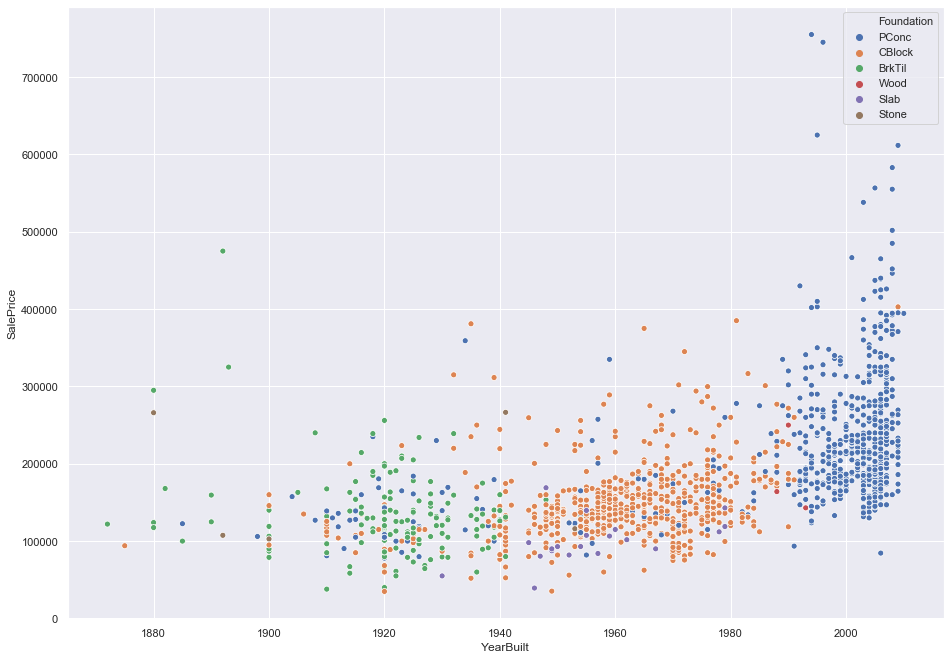

In [88]:
sns.scatterplot(x="YearBuilt", y="SalePrice", hue="Foundation",
                data=houses)
sns.set(rc={'figure.figsize':(15.7,6.27)})

### 7. Overall Condition against Price

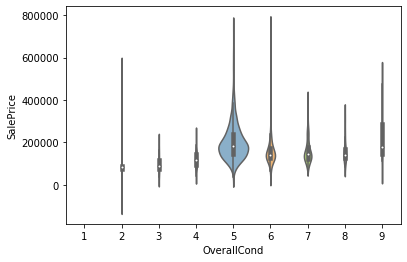

In [9]:
sns.violinplot(x="OverallCond", y="SalePrice", data=houses, palette="Set3", scale= "count")

### 8. Above Ground Living Area SQFT grouped by Overall Quality against Price

In [ ]:
sns.lmplot(x="GrLivArea", y="SalePrice", hue="OverallQual",
               height=5, data=houses.loc[houses["OverallQual"] > 5])

In [ ]:
# sns.lmplot(x="YearBuilt", y="SalePrice", hue="OverallCond",
#                height=5, data=houses.loc[houses["OverallCond"] == 5])

### 9. Log of Sale Price

((array([-3.30340654, -3.04607408, -2.90296155, ...,  2.90296155,
          3.04607408,  3.30340654]),
  array([7.16840692, 7.17361177, 7.20496751, ..., 8.31839844, 8.38044705,
         8.38512322])),
 (0.1568385672423813, 7.820379093304842, 0.9954920322296986))

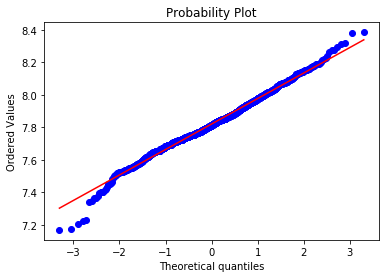

In [26]:
from scipy import stats
stats.probplot(stats.boxcox(houses.SalePrice)[0], plot=plt)

In [190]:

houses = pd.read_csv("../data/train.csv", index_col = "Id")
houses["Alley"] = houses["Alley"].map(lambda x: "No" if pd.isna(x) else "Yes")
houses.groupby("Fence")["Fence"].agg("count")#.plot.bar()
houses["Fence"] = houses["Fence"].map(lambda x: "No" if pd.isna(x) else "Yes")
houses["PoolQC"] = houses["PoolQC"].map(lambda x: "No" if pd.isna(x) else "Yes")
houses.groupby("Alley")["Alley"].agg("count")#.plot.bar(color="orange", figsize=(7, 5))
# plt.ylabel("Count")
# houses.shape

Alley
No     1369
Yes      91
Name: Alley, dtype: int64

In [188]:
houses.groupby("PoolQC")["PoolQC"].agg("count")#.plot.bar(figsize=(7, 5))
# plt.ylabel("Count")

PoolQC
No     1453
Yes       7
Name: PoolQC, dtype: int64

In [189]:
houses.groupby("Heating")["Heating"].agg("count")#.plot.bar(color="maroon", figsize=(7, 5))
# plt.ylabel("Count")

Heating
Floor       1
GasA     1428
GasW       18
Grav        7
OthW        2
Wall        4
Name: Heating, dtype: int64

Text(0, 0.5, 'Count')

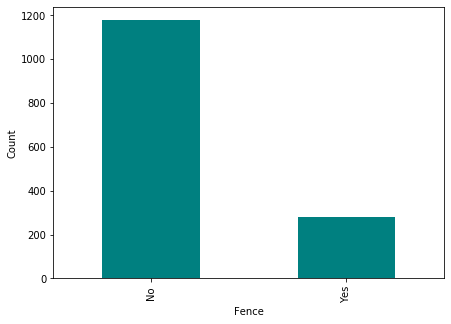

In [61]:
houses.groupby("Fence")["Fence"].agg("count").plot.bar(color="teal", figsize=(7, 5))
plt.ylabel("Count")

In [ ]:
# houses[(houses['CentralAir'] == "N")][["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")
# houses[(houses['Alley'] == "Grvl")].plot.bar()#[["SalePrice", "YearBuilt"]].plot.scatter(x="YearBuilt", y="SalePrice")

In [ ]:
# houses['CentralAir'].hist()

In [ ]:
# houses.groupby(["BsmtFinType1", "MSSubClass"])[["MSSubClass"]].count().plot.bar(figsize = (15, 5))

In [ ]:
# houses[(houses["PoolArea"] != 0)]["SalePrice"]

In [ ]:
# houses["SalePrice"].mean()

In [ ]:
# gargqual = houses.replace(np.nan, "NA").groupby(["GarageQual"])["GarageQual"].count()
# gargfin = houses.replace(np.nan, "NA").groupby(["GarageFinish"])["GarageFinish"].count()
# plt.bar(x=gargqual.index, height=gargqual.values)

In [ ]:
# houses.groupby("MasVnrType")[["MasVnrType"]].count().plot.bar()
# houses["AvgMasArea"] = houses.cut("MasVnrArea", 20)
# houses[["MasVnrArea", "SalePrice"]].plot.scatter(x="MasVnrArea" , y="SalePrice" )

In [ ]:
# houses["YearBuilt"].sort_values(ascending=False)